# <font color="yellow">Step1)</font> Pre-Requisites

# <font color="yellow">Step2)</font> GPU Support

# <font color="yellow">Step3)</font> Data Processing For  ANN

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

# Next, we create two empty lists. One will hold the input data, the other will hold the target data.
train_labels = []
train_samples = []

## Suppose that an experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants
> 95% 0f 65+ had side effects
> 95% of 65- didn't had side effects

<font color="orange">__So we want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age__</font>

```
This code creates 2100 samples and stores the age of the individuals in the train_samples list and stores whether or 
not the individuals experienced side effects in the train_labels list.
```

In [2]:
# Patients who experienced side-effects
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)  # Age of patients: 13-64
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)  # Age of patients: 65-100
    train_samples.append(random_older)
    train_labels.append(0)

# Patients who didn't experienced side-effects
for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [3]:
print("Len of Train Samples:",len(train_samples))
for i in train_samples[:15]:
    print(i, end=", ")

print("\nLen of Train Labels:",len(train_labels))
for i in train_labels[:15]:
    print(i, end=", ")


Len of Train Samples: 2100
22, 68, 13, 94, 31, 84, 14, 81, 17, 92, 53, 98, 33, 84, 32, 
Len of Train Labels: 2100
1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 

### Data Processing
We now convert both lists into numpy arrays due to what we discussed the fit() function expects
<br> And we then shuffle the arrays to remove any order that was imposed on the data during the creation process.

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

# We'll use scikit-learn’s MinMaxScaler class to scale all of the data down from a scale ranging from 13 to 100 to be on a scale from 0 to 1.
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
# We reshape the data since the fit_transform() function, used in few next steps, doesn’t accept 1D data by default.

# <font color="yellow">Step4)</font> Create an Artificial Neural Network with TensorFlow's Keras API

Previously, we could access the Dense module from Keras with the following import statement
```
 from keras.layers import Dense
```

Now, using Keras with TensorFlow, the import statement looks like this:
```
from tensorflow.keras.layers import Dense
```

___

## <font color="green">Before TensorFlow Integration</font>
```
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
```

## <font color="green">After TensorFlow Integration</font>
```
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
```

## <font color="orange">First, we need to import all the libraries we’ll be making use of</font>


In [5]:
# Note these modules would be used for creation of ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

# Note that we'll make use of these two modules in the next episode when we train the model.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

## <font color="orange">Build A Sequential Model</font>

In [6]:
# "model" is an instance of a Sequential object
# A tf.keras.Sequential model is a linear stack of layers
# It accepts a list, and each element in the list should be a layer.

model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

### First Hidden Layer:
- Our first layer is a <font color="red">__Dense layer__</font>. This type of layer is our standard fully-connected or densely-connected neural network layer. <br>
> Dense Layer will allow the connectivity between all the neurons from previous layers to be connected to next layer, i.e. yielding a dense interconnection <br>

- The first required parameter that the Dense layer expects is the number of neurons or <font color="red">__units__ </font> the layer has, and we’re arbitrarily setting this to 16.

- Additionally, the model needs to know the ___shape of the input data___. For this reason, we specify the shape of the input data in the first hidden layer in the model (and ___only this layer___). The parameter called <font color="red">__input_shape__</font> is how we specify this.

- An optional parameter that we’ll set for the Dense layer is the <font color="red">__activation function__</font> to use after this layer. We’ll use the popular choice of __relu__. Note, if you don’t explicitly set an activation function, then ___Keras will use the linear activation function as default activation function___.

## Second Hidden Layer
Our next layer will also be a <font color="red">__Dense layer__</font>, and this one will have <font color="red">__32 nodes__</font>. The choice of how many neurons this node has is also arbitrary

## Output Layer
Lastly, we specify the output layer. This layer is also a <font color="red">__Dense layer__</font>, and it will have <font color="red">__2 neurons__</font>. <br>
This is because we have two possible outputs: _either a patient experienced side effects, or the patient did not experience side effects_.

This time, the activation function we’ll use is <font color="red">__softmax__</font>, which will give us a probability distribution among the possible outputs.

In [7]:
# Note that we can call summary() on our model to get a quick visualization of it.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


___
__Next__: Next we’ll train this model on the data we created last time.
___

# <font color="yellow">Step5)</font> Train & Fit ANN

## <font color="orange">Training The Model</font>

In [ ]:
# Compiling The Model
# The first thing we need to do to get the model ready for training is call the compile() function on it.
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

First, we specify the optimizer <font color="teal">__Adam__</font>. <font color="teal">__Adam__</font> accepts an optional parameter <font color="teal">__learning_rate__</font>, which we’ll set to 0.0001 <br>
___Adam optimization is a stochastic gradient descent (SGD) method___

The next parameter we specify is <font color="teal">__loss__</font>. We’ll be using <font color="teal">__sparse_categorical_crossentropy__</font>, given that _our labels are in integer format_

when we have only two classes, we could instead configure our output layer to have only one output, rather than two, and use ___binary_crossentropy___ as our loss, rather than ___categorical_crossentropy___. Both options work equally well and achieve the exact same result.

With binary_crossentropy, however, the last layer would need to use sigmoid, rather than softmax, as its activation function.

The last parameter we specify in ___compile()___ is <font color="teal">__metrics__</font> <br>
This parameter expects a _list of metrics that we’d like to be evaluated by the model during training and testing_. We’ll set this to a list that contains the string ___‘accuracy’___.




## <font color="orange">Fitting the model</font>

In [ ]:
model1.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

## <font color="orange">Observations from result</font>
The first item that we pass in to the fit() function is the training set __x__, i.e. _scaled_train_samples_ <br>
The next parameter that we set is the labels for the training set __y__, which we previously gave the name _train_labels_

We then specify the batch_size. Again, the concept of <font color="red">__batch size__</font> is covered in detail in the [Deep Learning Fundamentals course](https://deeplizard.com/learn/playlist/PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU).

Next, we specify how many <font color="red">__epochs__</font> we want to run. We set this to 30. Note that an epoch is a single pass of all the data to the network.

Lastly, we specify <font color="red">__verbose=2__</font>. This just specifies how much output to the console we want to see during each epoch of training. The verbosity levels range from 0 to 2, so we’re getting the most verbose output.

When we call <font color="red">__fit()__</font>. on the model, the model trains, and we get this output.


### We can see corresponding output for each of the <font color="red">__30 epochs__</font>. Judging by the <font color="red">__loss and accuracy__</font>, we can see that both metrics steadily improve over time with accuracy reaching almost <font color="red">__93%__</font> and loss steadily decreasing until we reach <font color="red">__0.27__</font>

# <font color="yellow">Step6)</font> Building A __Validation Set__
After training a model, we want to make sure that our trained model could work fine also with new data that would be fed to it in future. <br>
To assure this confirmity, we expose the data to a new set of values which our trianed model has never seen before and then we note how our data is performing, i,e, _checking if trained model is generalising well or not and what are it's accuracy with newly exposed data_ <br>

This <font color="red">__Validation set__</font> can be created by taking subset of the training data before performing any operation on it, and separate it as a different set and labeling it as ___Validation Set___

In [8]:
# Compiling The Model
# The first thing we need to do to get the model ready for training is call the compile() function on it.
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6806 - accuracy: 0.4783 - val_loss: 0.6649 - val_accuracy: 0.5143
Epoch 2/30
189/189 - 0s - loss: 0.6446 - accuracy: 0.5974 - val_loss: 0.6324 - val_accuracy: 0.6095
Epoch 3/30
189/189 - 0s - loss: 0.6117 - accuracy: 0.6825 - val_loss: 0.6004 - val_accuracy: 0.6857
Epoch 4/30
189/189 - 0s - loss: 0.5752 - accuracy: 0.7545 - val_loss: 0.5649 - val_accuracy: 0.7762
Epoch 5/30
189/189 - 0s - loss: 0.5412 - accuracy: 0.7894 - val_loss: 0.5331 - val_accuracy: 0.8095
Epoch 6/30
189/189 - 0s - loss: 0.5088 - accuracy: 0.8222 - val_loss: 0.5022 - val_accuracy: 0.8333
Epoch 7/30
189/189 - 0s - loss: 0.4775 - accuracy: 0.8429 - val_loss: 0.4725 - val_accuracy: 0.8476
Epoch 8/30
189/189 - 0s - loss: 0.4476 - accuracy: 0.8603 - val_loss: 0.4452 - val_accuracy: 0.8714
Epoch 9/30
189/189 - 0s - loss: 0.4200 - accuracy: 0.8661 - val_loss: 0.4202 - val_accuracy: 0.8857
Epoch 10/30
189/189 - 0s - loss: 0.3949 - accuracy: 0.8873 - val_loss: 0.3979 - val_accuracy: 0.8857

___
> _Note that the fit() function shuffles the data before each epoch by default. When specifying the validation_split parameter, however, the validation data is selected from the last samples in the x and y data before shuffling._

Therefore, in the case we're using validation_split in this way to create our validation data, ___we need to be sure that our data has been shuffled ahead of time, like we previously did in <font color="yellow">Step3</font>___

> We can now see not only how well our model is learning the features of the training data, but also how well the model is generalizing to new, unseen data from the validation set
> Next, we'll see how to use our model for inference
___

# <font color="yellow">Step7)</font> __ANN Predictions__
When we train a model, the hope is that we’ll later be able to take the trained model, apply it to new data, and have the model generalize and accurately predict on data it hasn’t seen before.

- For example, suppose we have a model that categorizes images of cats or dogs and that the training data contained thousands of images of cats and dogs from a particular data set online.

- Now suppose, that later we want to take this model and use it to predict on other images of cats and dogs from a different data set. The hope is that, even though our model wasn’t exposed to these particular dog and cat images during training, it will still be able to accurately make predictions for them based on what it’s learned from the cat and dog data set from which it was trained.

We call this process <font color="red">_inference_</font>, as the model is using its knowledge gained from training and using it to infer a prediction or result.

Given the results we’ve seen from the validation data, it appears that this model should do well on predicting on a new test set.

## <font color="orange">Creating The Test Set</font>
Similar to <font color="yellow">Step3</font>

In [9]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## <font color="orange">Evaluating The Test Set</font>
To get predictions from the model for the test set, we call <font color="red">__model.predict()__</font>
> Note that, unlike with training and validation sets, we do not pass the labels of the test set to the model during the inference stage.

In [10]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=1
)  

42/42 [==============================] - 0s 1ms/step


Each element in the predictions list is itself a list of length 2. 
> The sum of the two values in each list is 1

The reason for this is because <font color="green">__the two columns contain probabilities for each possible output: experienced side effects and did not experience side effects__</font>

- The first column contains the probability for each patient not experiencing side effects <br>
> <font color="red">not experiencing side effects</font> is represented by a 0 <br>
- The second column contains the probability for each patient experiencing side effects <br>
> <font color="red">experiencing side effects</font> is represented by a 1 <br>

In [11]:
for i in predictions[:15]:
    print(i)


[0.05263274 0.9473672 ]
[0.1816221 0.818378 ]
[0.96497136 0.0350286 ]
[0.05979005 0.94021   ]
[0.03812337 0.96187663]
[0.05979005 0.94021   ]
[0.16120909 0.83879095]
[0.9424778 0.0575221]
[0.9694109  0.03058911]
[0.9699055  0.03009455]
[0.07720424 0.9227957 ]
[0.9684544  0.03154553]
[0.97001517 0.02998481]
[0.9620686  0.03793141]
[0.02410694 0.9758931 ]


In [12]:
# Most probable prediction for each sample
rounded_predictions = np.argmax(predictions, axis=-1)
print("Index of most probable prediction for each sample:",rounded_predictions[:15])

Index of most probable prediction for each sample: [1 1 0 1 1 1 1 0 0 0 1 0 0 0 1]


## We can observe the underlying predictions from the model, however, we cannot judge how accurate these predictions are just by looking at the predicted output.

If we have corresponding labels for the test set,and compare these labels to the predicted labels, <br>
> We can visualize the accuracy of the model's evaluations via a visualizing tool called <font color="red">___confusion matrix___</font>

This will aid us in being able to visually observe how well a neural network is predicting during inference.

<img src="./imgs/confusion_matri_interpretation.jpeg" style="width:500px"> <br>

- <font color="red">__FN__: Prediction is Negative, but that is a False Prediction </font>
- <font color="red">__FP__: Prediction is Positive, but that is a False Prediction </font>
- <font color="green">__TP__: Prediction is Positive, and that is a True Prediction </font>
- <font color="green">__TN__: Prediction is Negative, and that is a True Prediction </font>
   

# <font color="yellow"> Step8)</font> Plotting A Confusion Matrix

In [13]:
#First, we import all the required libraries we’ll be working with.

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

<font color="orange">The confusion matrix we’ll be plotting comes from scikit-learn </font>

We then create the confusion matrix and assign it to the variable <font color="red">__cm__<font>

In [14]:
# To the confusion matrix, we pass in the true labels test_labels as well as the network’s predicted labels rounded_predictions for the test set
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

## <font color="orange">We have a function called plot_confusion_matrix() that came directly from scikit-learn</font>

In [15]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## <font color="orange">Next, we define the labels for the confusion matrix. In our case, the labels are titled “no side effects” and “had side effects.”</font>

In [16]:
cm_plot_labels = ['no_side_effects','had_side_effects']

## <font color="orange">Lastly, we plot the confusion matrix by using the plot_confusion_matrix() function we just defined </font>

Confusion matrix, without normalization
[[187  23]
 [  9 201]]


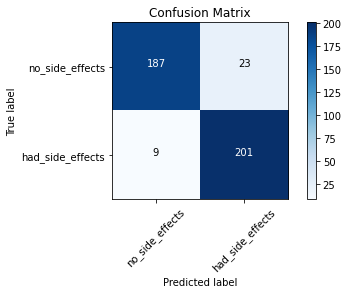

In [17]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## <font color="orange">Reading A Confusion Matrix</font>
- We have the predicted labels on the x-axis and the true labels on the y-axis <br>
- The blue cells running from the top left to bottom right contain the number of samples that the model accurately predicted <br>
- The white cells contain the number of samples that were incorrectly predicted <br>

#### We can see that the <font color="green">model accurately predicted 397 and incorrectly predicted 23</font> out of the 420 total samples

# <font color="yellow">Step9)</font> Save And Load A Model
If we want to save a model at its current state after it was trained so that we could make use of it later, we can call the <font color="red">save()</font> function on the model. <br>
To save(), we pass in the file path and name of the file we want to save the model to with an <font color="red">.h5 extension</font>
- Note, this function also allows for saving the model as a _Tensorflow <font color="green">SavedModel</font>_ as well if you'd prefer.

## <font color="orange">9.a) Model.Save</font>

In [19]:
model.save('medical_trial_model.h5')

This __save__ function saves:
- Architecture of the model
- Weights of the model
- Training Configuration (loss, optimizer)
- Supports resuming the training of the model from the point it was saved, by saving the State of the optimizer

## <font color="orange">Now that we have this model saved, we can load the model at a later time</font>

In [22]:
from tensorflow.keras.models import load_model
new_model = load_model('saved_models/medical_trial_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Available alternatives:
- json Architecture, i.e. This will not save the model weights, configurations, optimizer, loss or anything else. This only saves the architecture of the model

```sh
json_string = model.to_json()
json_string
```

```sh
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)
model_architecture.summary()
```
- Similarly yaml_string
```
yaml_string = model.to_yaml() and model_from_yaml()
```

## <font color="orange">9.b) Model.to_json</font>

In [23]:
json_string = model.to_json()
json_string
# Displays the details of the model architecture

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [24]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## <font color="orange">9.c) Saving And Loading The Weights Of The Model</font>


In [25]:
model.save_weights('saved_models/medical_trial_model_weights.h5')

### At a later point, we could then load the saved weights in to a new model, but the new model will need to have the same architecture as the old model before the weights can be saved.


In [27]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model2.load_weights('saved_models/medical_trial_model_weights.h5')

In [28]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
